# Bode plots, Nyquist plots, ans stability margins

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE3093: Automatic control, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

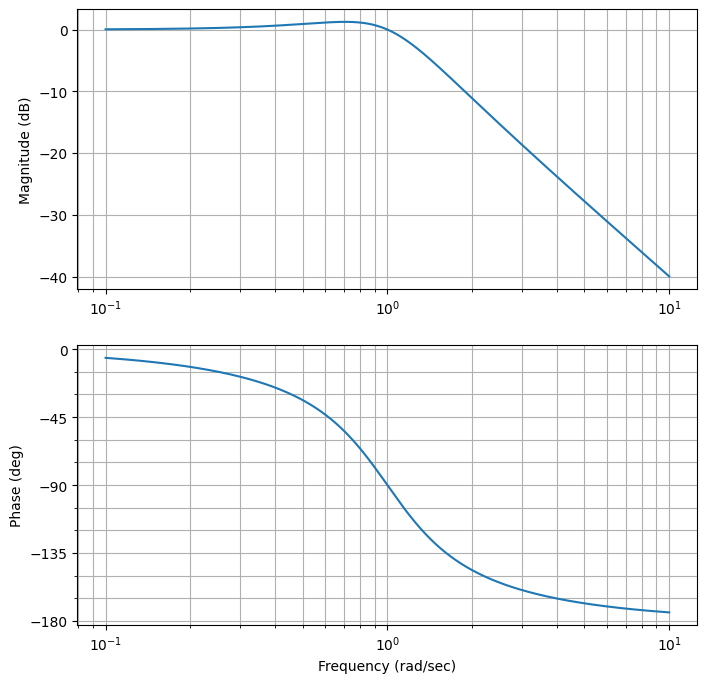

In [ ]:
omega = 1
zeta = 0.5
num = np.array([omega**2])
den = np.array([1, 2*zeta*omega, omega**2])
G = tf(num, den)

r = 15
bode(G, Hz=False)
fig = plt.gcf().set_size_inches(8, 8)
plt.show()


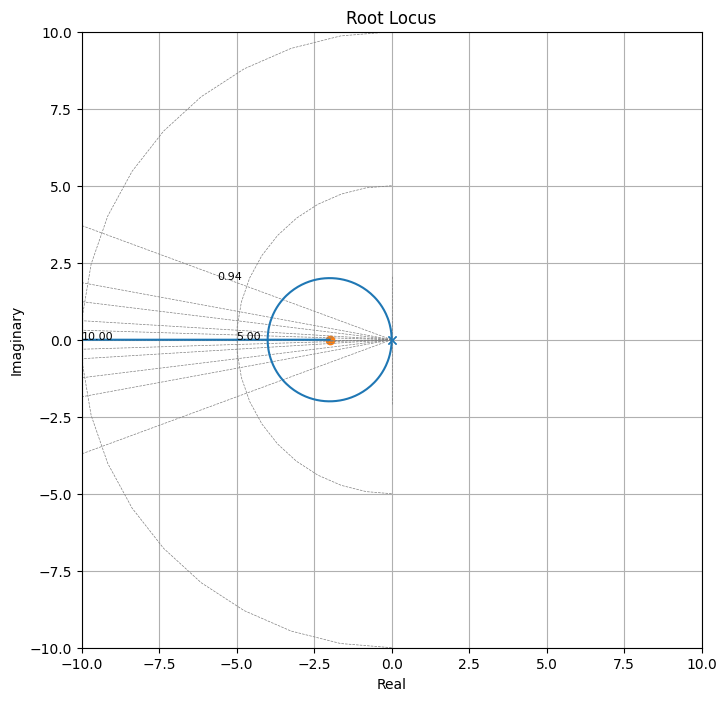

In [ ]:
num = np.array([1, 2])
den = np.array([1, 0, 0])
G = tf(num, den)

r = 10
rlocus(G)
fig = plt.gcf().set_size_inches(8, 8)
plt.xlim([-r, r]), plt.ylim([-r, r])
plt.grid()
plt.show()

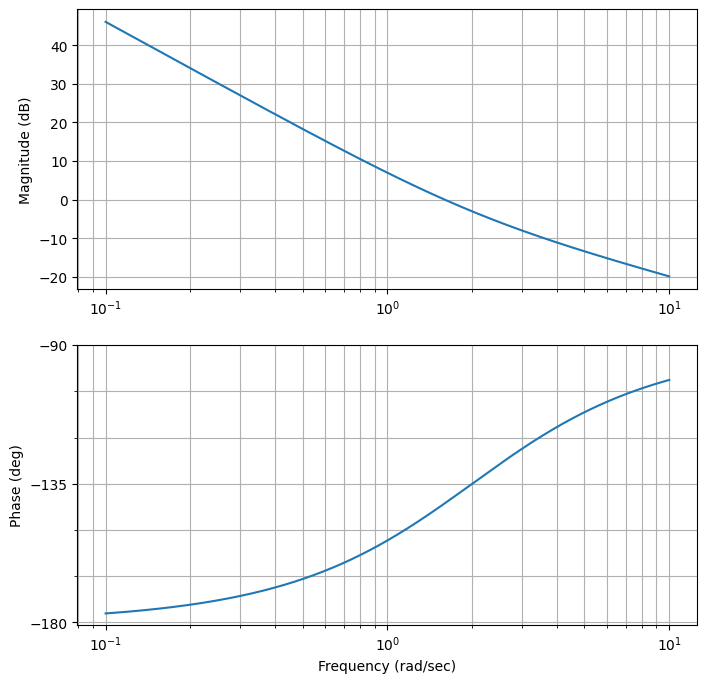

In [ ]:
bode(G, Hz=False)
fig = plt.gcf().set_size_inches(8, 8)
plt.show()

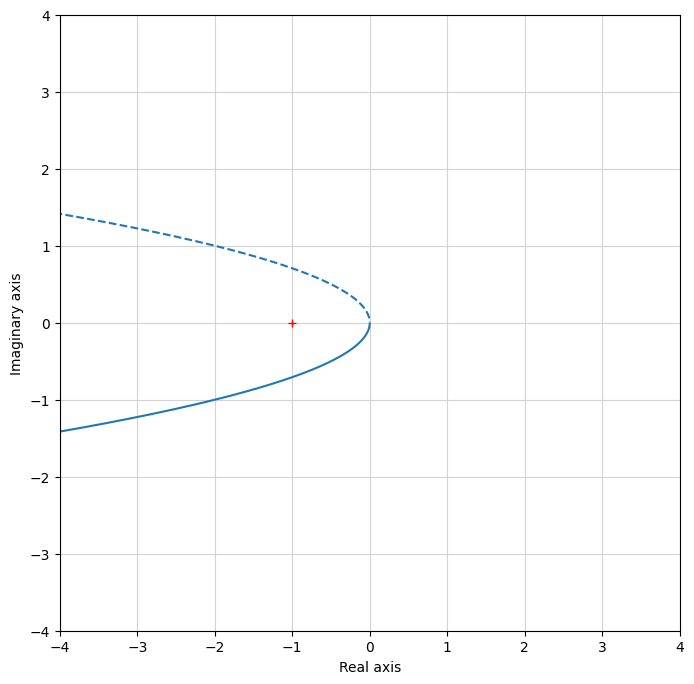

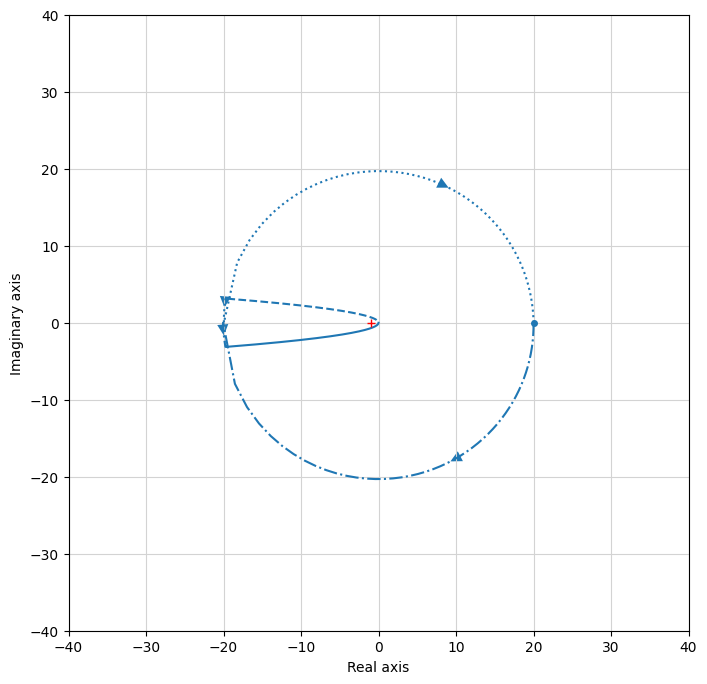

In [ ]:
r = 4
nyquist(G)
fig = plt.gcf().set_size_inches(8, 8)
plt.xlim([-r, r]), plt.ylim([-r, r])
plt.show()

r = 40
nyquist(G)
fig = plt.gcf().set_size_inches(8, 8)
plt.xlim([-r, r]), plt.ylim([-r, r])
plt.show()

In [ ]:
pole(feedback(G,4,-1))

array([-2.+2.j, -2.-2.j])

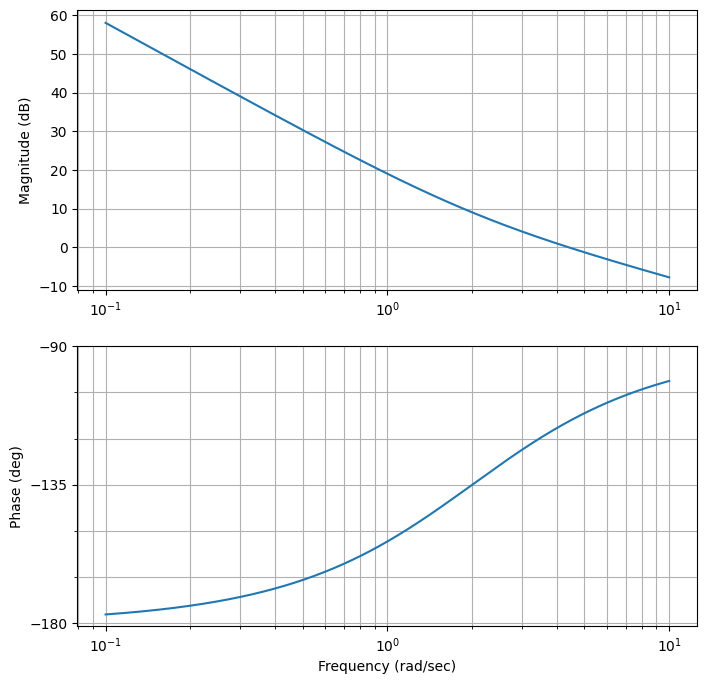

In [ ]:
bode(4*G, Hz=False)
fig = plt.gcf().set_size_inches(8, 8)
plt.show()

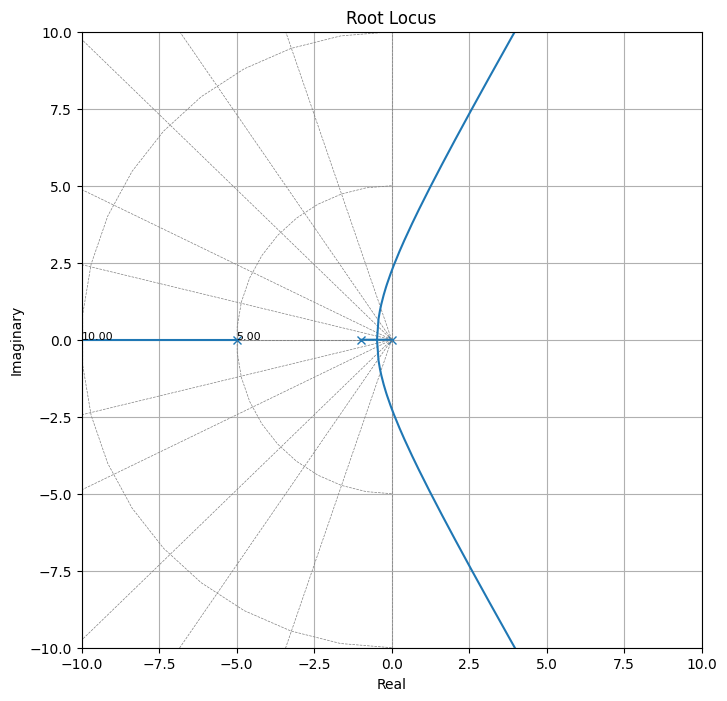

In [ ]:
num = np.array([15])
den = np.array([1, 6, 5, 0])
G = tf(num, den)

r = 10
rlocus(G)
fig = plt.gcf().set_size_inches(8, 8)
plt.xlim([-r, r]), plt.ylim([-r, r])
plt.grid()
plt.show()

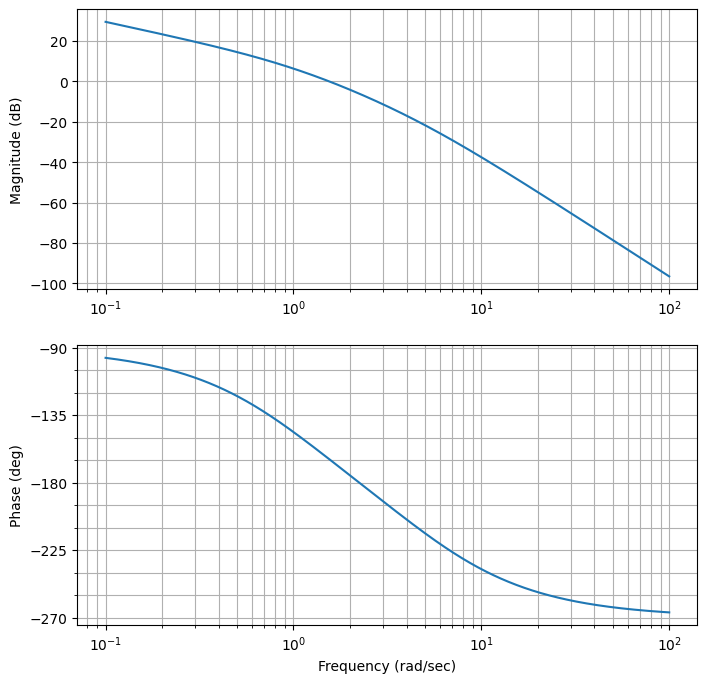

In [ ]:
bode(G, Hz=False)
fig = plt.gcf().set_size_inches(8, 8)
plt.show()

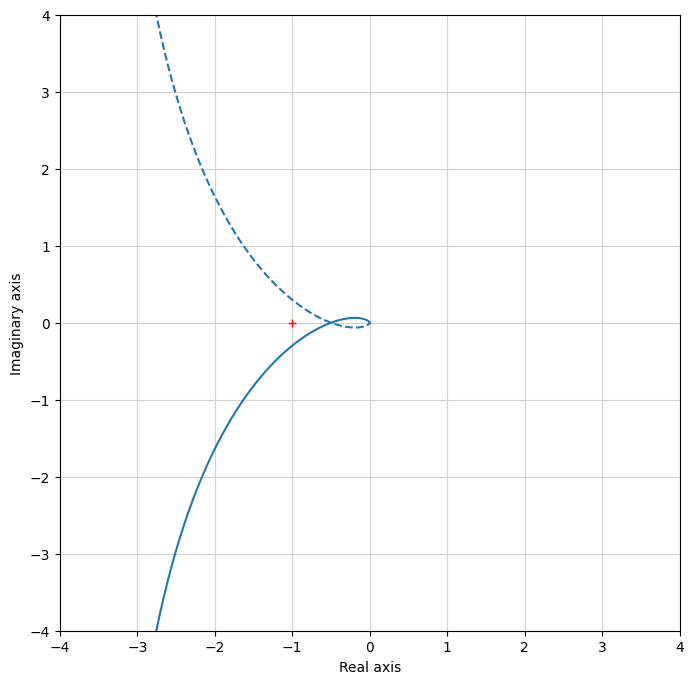

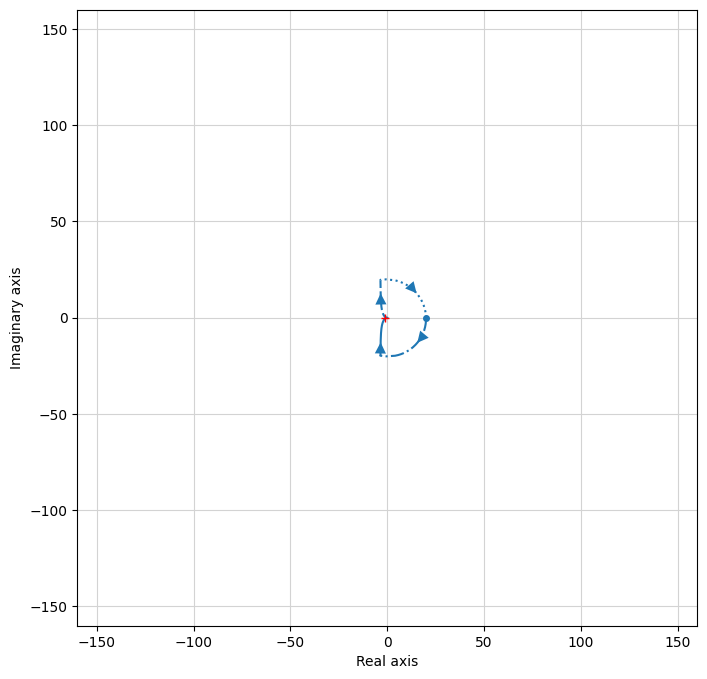

In [ ]:
nyquist(G)
r = 4
fig = plt.gcf().set_size_inches(8, 8)
plt.xlim([-r, r]), plt.ylim([-r, r])
plt.show()

nyquist(G)
r = 160
fig = plt.gcf().set_size_inches(8, 8)
plt.xlim([-r, r]), plt.ylim([-r, r])
plt.show()

In [ ]:
margin(G)

(2.0000000000000004, 15.552687434223344, 2.23606797749979, 1.5519216327158523)

In [ ]:
def plot_margins(sys):
#    mag,phase,omega = bode(sys,dB=True,Plot=False)
    mag,phase,omega = bode(sys,dB=True,plot=False)
    magdB = 20*np.log10(mag)
    phase_deg = phase*180.0/np.pi
    Gm,Pm,Wcg,Wcp = margin(sys)
    GmdB = 20*np.log10(Gm)
    ##Plot Gain and Phase
    f,(ax1,ax2) = plt.subplots(2,1)
    ax1.semilogx(omega,magdB)
    ax1.grid(which="both")
    ax1.set_xlabel('Frequency (rad/s)')
    ax1.set_ylabel('Magnitude (dB)')
    ax2.semilogx(omega,phase_deg)
    ax2.grid(which="both")
    ax2.set_xlabel('Frequency (rad/s)')
    ax2.set_ylabel('Phase (deg)')
    ax1.set_title('Gm = '+str(np.round(GmdB,2))+' dB (at '+str(np.round(Wcg,2))+' rad/s), Pm = '+str(np.round(Pm,2))+' deg (at '+str(np.round(Wcp,2))+' rad/s)')
    ###Plot the zero dB line
    ax1.plot(omega,0*omega,'k--',linewidth=2)
    ###Plot the -180 deg lin
    ax2.plot(omega,-180+0*omega,'k--',linewidth=2)
    ##Plot the vertical line from -180 to 0 at Wcg
    ax2.plot([Wcg,Wcg],[-180,0],'r--',linewidth=2)
    ##Plot the vertical line from -180+Pm to 0 at Wcp
    ax2.plot([Wcp,Wcp],[-180+Pm,0],'g--',linewidth=2)
    ##Plot the vertical line from min(magdB) to 0-GmdB at Wcg
    ax1.plot([Wcg,Wcg],[np.min(magdB),0-GmdB],'r--',linewidth=2)
    ##Plot the vertical line from min(magdB) to 0db at Wcp
    ax1.plot([Wcp,Wcp],[np.min(magdB),0],'g--',linewidth=2)
    return Gm,Pm,Wcg,Wcp

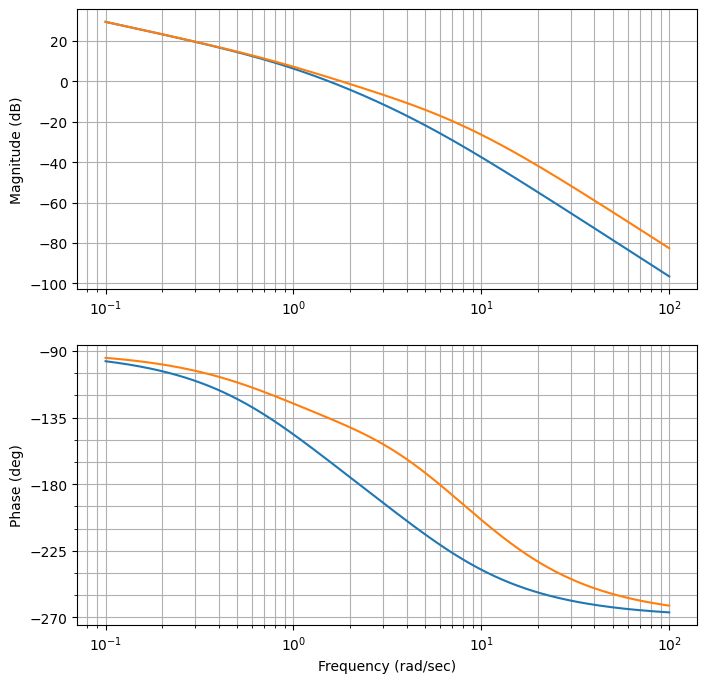

In [ ]:
K = zpk([-2],[-10],5)
bode(G,G*K, Hz=False)
fig = plt.gcf().set_size_inches(8, 8)
plt.show()

(6.969340028069279, 40.90168542948257, 5.982790434368795, 1.8102803080172076)

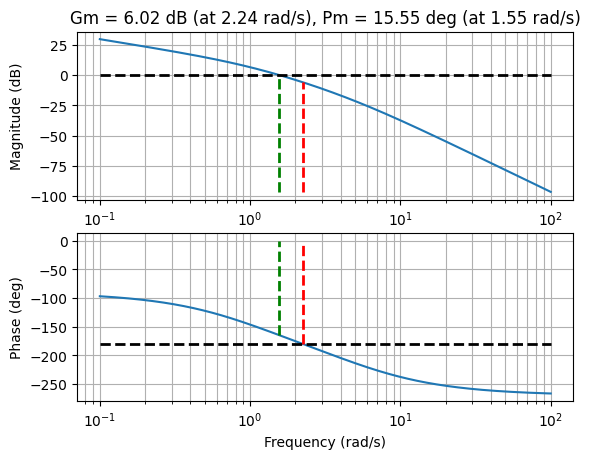

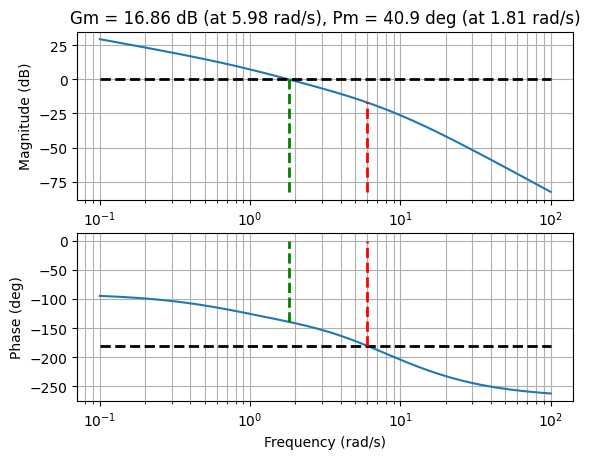

In [ ]:
plot_margins(G)
plot_margins(G*K)

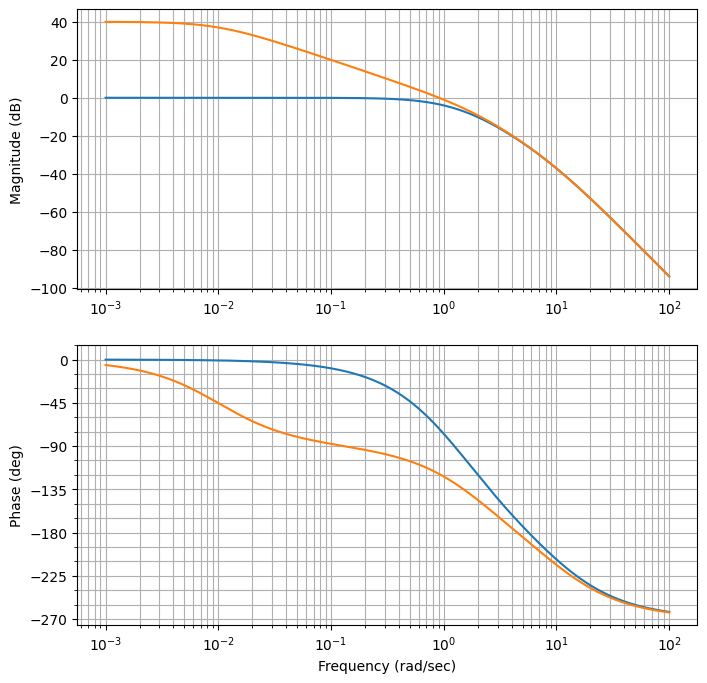

In [ ]:
G2 = zpk([],[-1,-2,-10],20)
K2 = zpk([-1],[-0.01],1)
bode(G2,G2*K2, Hz=False)
fig = plt.gcf().set_size_inches(8, 8)
plt.show()